In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

- 공공데이터 포털에 있는 데이터를 Pandas의 melt, concat, transpose와 같은 reshape 기능을 활용해 분석
- groupby, pivot_table, info, describe, value_counts등을 통한 데이터 요약과 분석
- 이를 통해 전혀 다른 두 데이터의 정제와 병합, 수치형 데이터의 차이를 이해하고 다양한 그래프로 시각화(barplot, lineplot, scatterplot, lmplot, swarmplot, histplot)

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [2]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본으로 하려면
# import matplotlib.font_manager as fm
# font_name = fm.FontProperties(fname= 'C:/Windows/Fonts/GOTHIC.TTF').get_name()
# plt.rc('font', family=font_name)
# plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# # warning(경고) 안보이게
# import warnings
# warnings.filterwarnings(action='ignore') # 경고 메세지 무시

# 2. 데이터 다운로드
- https://www.data.go.kr 에서 "아파트 분양 가격"을 검색한 csv 다운로드

## (1) 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색

In [7]:
df_first = pd.read_csv('C:/ai_x/download/부동산_250213/지역_연도별_평당가격.csv', encoding='cp949')
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [9]:
df_first.shape

(17, 22)

In [10]:
pd.options.display.max_columns = 22
df_first.tail(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,7833,7724,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [ ]:
# isnum(), isnull() : 결측치 여부
# notna(), notbull() : 결측치가 아닌지 여부
df_first.isna().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [19]:
# set_index('열이름') : 열을 index로 setting
# reset_index() : index를 열로 setting
df_first.set_index('지역', inplace=True)

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

<Axes: ylabel='지역'>

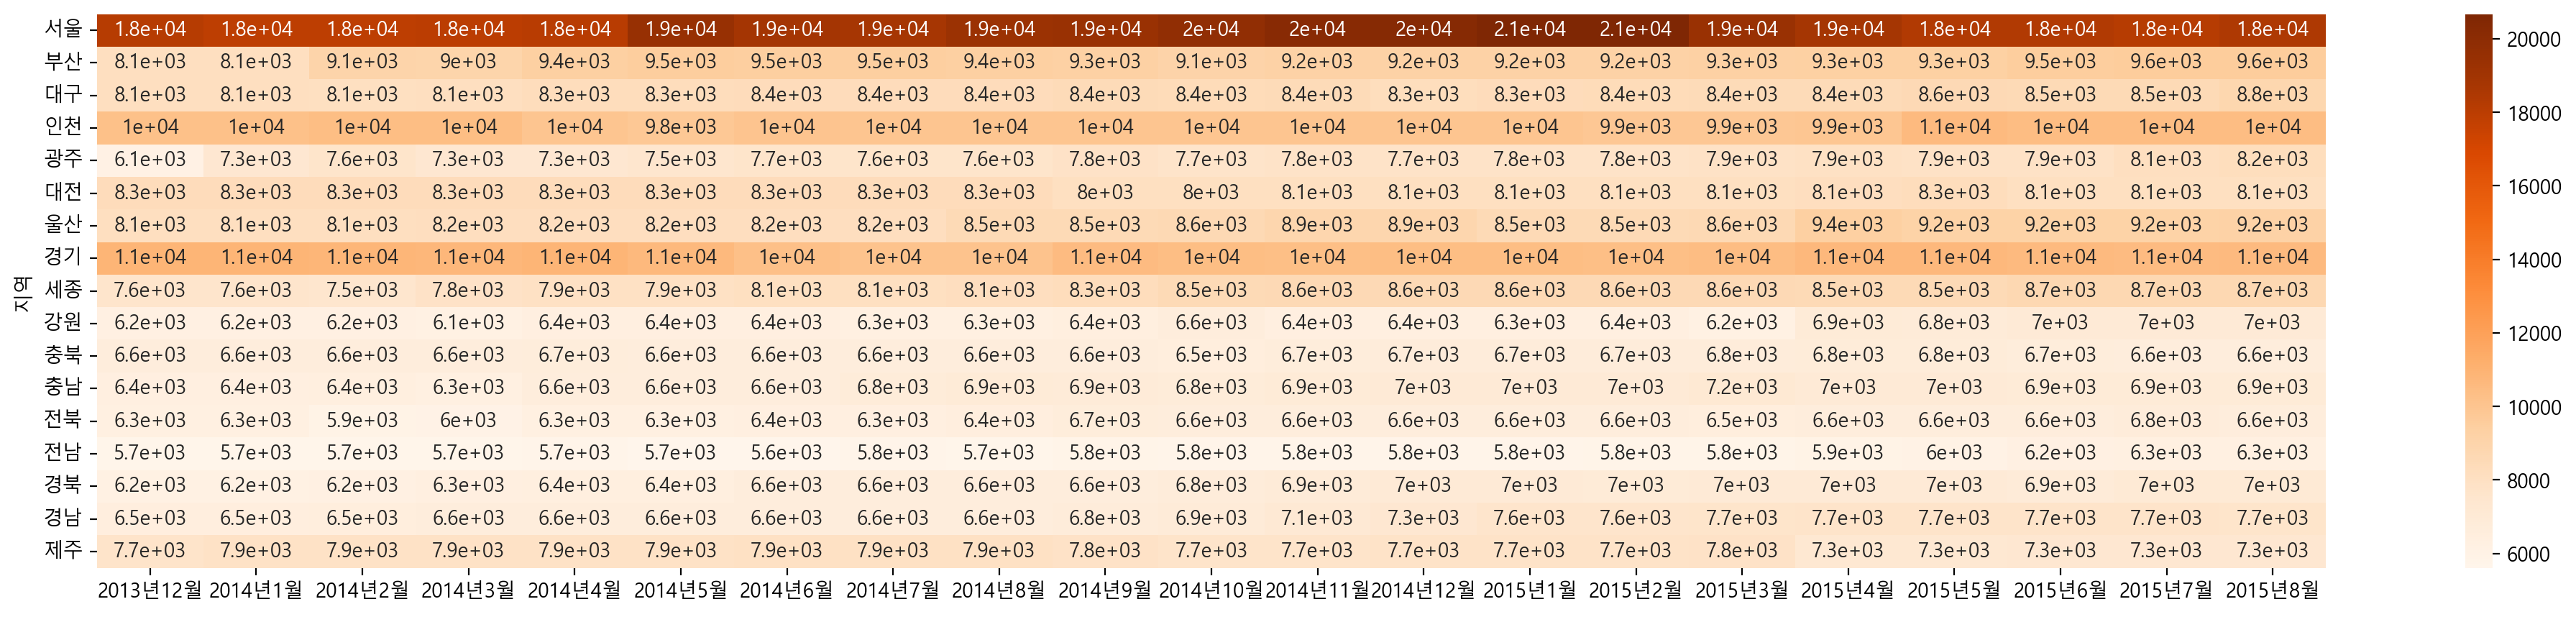

In [42]:
df_first.head()
plt.figure(figsize=(25, 5))
sns.heatmap(df_first, annot=True, cmap='Oranges')

## (2) 2015이후 데이터 분양가격에 간헐적으로 comma(,) 추가하여 csv로 출력
- 분양가격에 np.nan, ' ', '  ', 8111  ->  np.nan, ' ', '  ', 8111, "8,111"

In [3]:
ex = pd.read_csv('C:/ai_x/download/부동산_250213/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv', encoding='cp949')
ex.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [46]:
# isna(), isnull() - 결측치 여부
# notnull(), notna() - 결측치가 아닌지 여부
print('전체갯수 : ', ex.shape[0])
print('결측치 아닌 갯수 : ', ex['분양가격(제곱미터)'].notna().sum())
print('결측치 갯수 : ', ex['분양가격(제곱미터)'].isna().sum())

전체갯수 :  9095
결측치 아닌 갯수 :  8481
결측치 갯수 :  614


In [48]:
# 분양가격(제곱미터)가 결측치인 행 상위2개
ex[ex['분양가격(제곱미터)'].isna()].head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터)
368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
369,광주,전용면적 102제곱미터초과,2016,2,NaN


In [4]:
# 분양가격(제곱미터) 컬럼의 type을 float64로 타입 변환 : astype(), pd.to_numeric()
# ex['분양가격(제곱미터)'].astype('float64') # 에러 이유 : ' '
# pd.to_numeric(ex['분양가격(제곱미터)']) # 에러 이유 : ' '
pd.to_numeric(ex['분양가격(제곱미터)'], errors='coerce')  # 에러나는 행은 NaN으로

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
9090    7703.0
9091       NaN
9092    7515.0
9093       NaN
9094    7950.0
Name: 분양가격(제곱미터), Length: 9095, dtype: float64

In [89]:
# 분양가격(제곱미터) 컬럼이 space인 행 740 - 614 = 126
ex[ex['분양가격(제곱미터)'].str.strip() ==''].head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
28,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,


In [5]:
nanex = ex.loc[368] # 분양 가격이 결측치인 데이터
spaceex = ex.loc[28] # 분양 가격이 space
ex.loc[0] # 분양 가격이 정상인 데이터

지역명             서울
규모구분          모든면적
연도            2015
월               10
분양가격(제곱미터)    5841
Name: 0, dtype: object

In [6]:
# 분양가격이 nan이거나 space면 0, 그외 분양가격의 문자자리수를 return하는 함수
def get_pricelen(row):
    price = row['분양가격(제곱미터)']
    if pd.notnull(price) and price.strip() != '' :
        return len(price)
    else:
        return 0

get_pricelen(nanex), get_pricelen(spaceex), get_pricelen(ex.loc[0])


(0, 0, 4)

In [7]:
ex['자리수'] = ex.apply(get_pricelen, axis=1)
ex.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,서울,모든면적,2015,10,5841,4
1,서울,전용면적 60제곱미터이하,2015,10,5652,4
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,4
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,4
4,서울,전용면적 102제곱미터초과,2015,10,5879,4


In [8]:
ex.index.name = 'idx'
ex.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
idx,,,,,,
0,서울,모든면적,2015,10,5841,4
1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [9]:
ex = ex.reset_index()
ex.head(2)

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),자리수
0,0,서울,모든면적,2015,10,5841,4
1,1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [10]:
# 2022년 데이터 흉내내기 위한 함수  : nan, ' ', '  ', '5123', '5,123'
def comma_append(row):
    price = row['분양가격(제곱미터)']
    if (row.idx%5 ==0) & (row.자리수 >= 4):
        price = price[:-3] + ',' + price[-3:]
    return price 

In [11]:
ex['분양가격(제곱미터)'] = ex.apply(comma_append, axis=1)

In [ ]:
ex.drop(['idx','자리수'], axis=1, inplace=True)

In [20]:
# 간헐적으로 평당분양가에 ,가 있거나 np.nan이 있거나 space가 있는 데이터 csv로 백업
ex.to_csv('data/ch13/ex.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'data\ch13'

## (3) 이후 데이터는 df_last 변수에 담아 탐색

In [ ]:
df_last = pd.read_csv('')

In [ ]:
# 데이터 요약하기


# 3. df_last의 데이터 결측치를 확인하고 대체 고민

In [ ]:
# 열별 결측치 갯수


In [ ]:
# 열별 결측치를 제외한 갯수


# 4. df_last 데이셋에 평당분양가격컬럼 추가

## (1) astype('float')나 pd.to_numeric() 사용
## (2) 6,222 => 6222 수정, space가 저장된 경우 nan으로 수정하는 함수를 apply나 map적용
## (3) df_last['분양가격(제곱미터)']*3.3

### apply

In [ ]:
# 콤마가 있는 문자에서 콤마 없애기 방법1
temp = '12,523'


In [ ]:
# 콤마가 있는 문자에서 콤마 없애기 방법2
temp = '12,523'


In [ ]:
# 분양가격 컬럼에 콤마(,)가 있는 경우 콤마(,)를 제거('5,123' -> '5123')
# 공백문자가 있는 경우 np.nan로 바꾸는 함수
def commadrop(row):
    pass

commadrop(df_last.loc[0]) # 콤마 제외
commadrop(df_last.loc[1]) # 그대로
commadrop(df_last.loc[28]) # 공백문자의 경우 nan
commadrop(df_last.loc[368]) # nan의 경우 nan

In [ ]:
# 공백문자는 결측치로, 콤마는 제거하기를 모든 행에 적용


### map

In [ ]:
df_last.drop(['제곱미터당분양가격'], axis=1, inplace=True)
df_last.sample(1)

In [ ]:
# 결측치->결측치 return, 공백문자->결측치 return, '3,198' -> 3198 return, '3198'->3198 return,  
def commadrop2(price):
    pass

commadrop2(df_last.loc[0, '분양가격(제곱미터)']) # 콤마제외한 문자를 숫자로 
commadrop2(df_last.loc[1, '분양가격(제곱미터)']) # 콤마없는 문자를 숫자로 
commadrop2(df_last.loc[28, '분양가격(제곱미터)']) # 공백문자를 nan
commadrop2(df_last.loc[368, '분양가격(제곱미터)']) # nan을 nan

- apply(함수, axis) : 1차원, 2차원(axis 지정. axis기본값0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [ ]:
#df_last['분양가격(제곱미터)'].apply(commadrop2)
#df_last['분양가격(제곱미터)'].map(commadrop2)

# 5. df_last 데이터셋에서 전용면적 컬럼을 추가한다
- 전용면적 컬럼, 필요없는 컬럼 처리로 메모리 절약

# 6. 메모리 사용량을 줄이기 위해 불필요한 컬럼 제거

In [ ]:
df_last.to_csv('data/df_last.csv', index=False) # 전처리 단계 백업

# 7. 데이터 집계
- GroupBy(unstack()함수 이용) vs. pivot_table()
- GroupBy가 조금 시간이 적게 걸릴 수 있음
- 우선 결측치 대체전 데이터 집계와 시각화를 할 예정

- df_last.groupby(["인덱스로사용할컬럼명"])["계산할컬럼명"].연산함수()
- df_last.pivot_table(index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")
- pd.pivot_table(df_last, index=["인덱스로사용할컬럼명"],
                    values=["계산할컬럼명"],
                    aggfunc="연산함수명")

## (1) 지역별 데이터수

## (2) 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

## (3) 전용면적별 평당분양가격(평균)

## (4) 지역별, 전용면적별 평당분양가격(평균)

## (5) 연도, 지역별 평당분양가격(평균)

- color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

# 8. matplotlib으로 시각화(위의 도표)
https://www.research.autodesk.com/publications/same-stats-different-graphs/
## (1) 지역별 결측치를 제외한 데이터수(line, bar)

## (2) 지역별 평당분양가격 (line, bar)

## (3) 전용면적별 평당분양가격(barplot)

## (4) 연도별 평균 평당분양가격(line)

범례:https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

# 9. seaborn으로 시각화
- 위에서 시각화한 내용을 seaborn으로 시각화

In [ ]:
sns.set(style='white', rc={'figure.figsize':(9,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

## (1) 지역별 평당분양가격

## (2) 연도별 평당분양가격

## (3) 그 외 lineplot, relplot, boxplot, violinplot, boxexplot, regplot, swarmplot

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용(교안 20page)

# 10. 구조가 다른 df_first와 df_last를 연결 후 분석
## (1) concat
- new_first :df_first를 [지역명, 연도, 월, 평당분양가격]으로 변환
- new_last : df_last를 [지역명, 연도, 월, 평당분양가격]으로 변환
                (전용면적이 모든면적인 행만 추출후, 전용면적 열을 삭제)

## (2) 결측치 대체(연도별, 지역별 중위값)

## (3) df.csv파일로 출력

## (4) 7절부터 9절까지 분석을 한다(전용면적별 분석은 불가)

- 지역명별 데이터 갯수는 결측치가 없어서 동일(groupby나 pivot_table등으로 확인)
- 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)
- 연도별 지역명별 평당분양가격(groupby, pivot_table, plot, seaborn 연습)

### ① 지역명별 데이터 행 갯수 : 결과가 1차원 시리즈

### ② 지역별 평당분양가격(평균, 최대값, ... 요약통계량)

In [ ]:
# 지역명당 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ③ 연도별 평당분양가격(평균)

In [ ]:
# 연도별 평당분양가격 시각화(lineplot과 matplotlib의 bar, sns의 barplot)

### ④ 연도, 지역별 평당분양가격(평균)

In [ ]:
# 연도별, 지역별 평당분양가격 시각화(heatmap)

In [ ]:
# 년도별 평균 평당분양가격의 추이

In [ ]:
# 위의 그래프가 겹쳐서 작 보이지 않아 분리

In [ ]:
# 관계형 그래프의 서브플롯을 그리는 함수는 relplot
# 범주형 그래프의 서브플롯을 그리는 함수는 catplot

In [ ]:
# 연도별 평당분양가격의 사분위수


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 boxenplot)


In [ ]:
# 연도별 평당분양가격의 사분위수(분포포함 violinplot)


In [ ]:
# 연도에 따른 평당분양가격을 회귀식으로 시각화


In [ ]:
# swarmplot은 많은 데이터를 그리기에는 시간이 많이 걸려 5%만 sampling후 그릴 것을 추천
# 연도별 평당분양가격 산점도
 

In [ ]:
# 분양가격을 hist
